# [Gradient Boosting](https://bit.ly/3wFWdwt)

### Celem jest poznanie algorytmu Gradient Boosting. 

`Boosting` jest sekwencyjnym algorytmem, który buduje `n` modeli, gdzie `n` może być od 1 do nawet kilku tysięcy modeli. W tym algorytmie każdy kolejny model próbuje naprawiać błędy poprzedniego modelu. Zwykle modelami są drzewa decyzyjne, ale mogą też być inne (np. model liniowy). Po prostu zwykle z drzewami działa on (`boosting`) najlepiej (dlatego jest to opcja domyślna).

`Boosting` (zwłaszcza trzy implementacje, które poznasz poniżej) umożliwia dostarczenie najlepszego możliwego wyniku.

Poznaj trzy najciekawsze implementacje `Gradient Boosting` (z punktu widzenia praktyki):
* [XGBoost](https://bit.ly/3uF6tD7)
* [LightGBM](https://bit.ly/3uF6uXH)
* [CatBoost](https://bit.ly/3d5diYT)

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)

from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold

from sklearn.metrics import r2_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve


import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
    
import matplotlib.pyplot as plt
%matplotlib inline

## Dane
Chcę Ci pokazać na przykładzie, jak użyć bibliotek. Zrobię to na "sztucznym" przykładzie (żeby na początku ułatwić sprawę). Do tego użyjemy funkcji `make_regression`, która wygeneruje dla nas dane. 

Żeby móc przeprowadzać eksperymenty, najpierw poznaj, jak działa `make_regression`.
Jednym z parametrów, który będziemy zmieniać w funkcji `make_regression` jest "szum" (ang. *noise*).

Funkcja na wyjściu zwraca 2 wartości: pierwsza to tablica z wartościami X, a druga to wektory.

### Sztucznie wygenerowane dane (`noise=0`) 

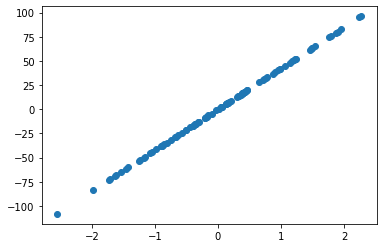

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=0., random_state=0)
plt.scatter(X,y);

### Sztucznie wygenerowane dane (`noise=5`) 

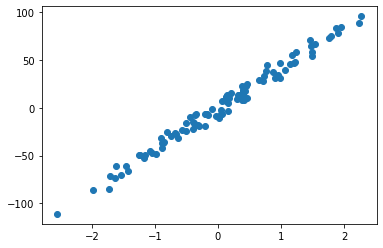

In [3]:
X, y = make_regression(n_samples=100, n_features=1, noise=5., random_state=0)
plt.scatter(X,y);

### Sztucznie wygenerowane dane (`noise=15`) 

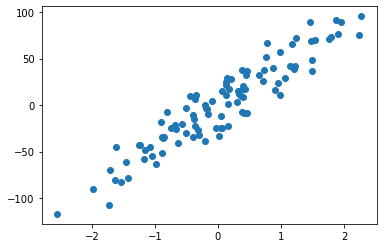

In [4]:
X, y = make_regression(n_samples=100, n_features=1, noise=15., random_state=0)
plt.scatter(X,y);

# Regresja (ang. regression)

Teraz wygenerujemy dane, np. 10000 wierszy i 100 kolumn (cech).

In [5]:
X, y = make_regression(n_samples=10000, n_features=100, noise=15, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## [Drzewo decyzyjne](https://bit.ly/3a4ieeJ) (`DecisionTreeRegressor`) i [lasy losowe](https://bit.ly/2PKWKwz) (`RandomForestRegressor`)
Sprawdźmy z ciekawości, jak poradzą sobie DecisionTree (DT) i RandomForest (RF).

CPU times: user 395 ms, sys: 3.21 ms, total: 398 ms
Wall time: 398 ms
CPU times: user 1.91 ms, sys: 220 µs, total: 2.13 ms
Wall time: 1.61 ms


0.4253600360965327

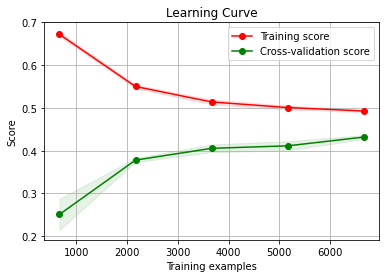

In [6]:
model = DecisionTreeRegressor(random_state=0, max_depth=5)

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True)

r2_score(y_test, y_pred)

### Rozkład błędów 

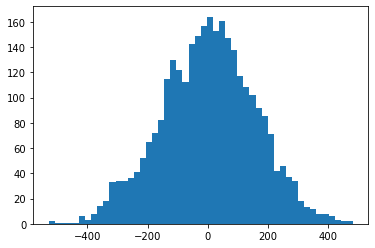

In [7]:
plt.hist(y_test - y_pred, bins=50);

Jak to interpretować? -400 oznacza, że model "powiedział" o 400 za dużo lub w drugą stronę: 400 oznacza że o 400 za mało itd.

## Las losowy (ang. `Random Forest`)

CPU times: user 2.34 s, sys: 2.41 ms, total: 2.34 s
Wall time: 2.35 s
CPU times: user 4.45 ms, sys: 331 µs, total: 4.78 ms
Wall time: 4.32 ms


0.5492597613952054

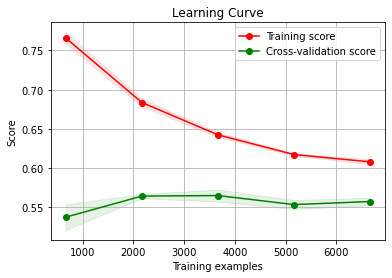

In [8]:
model = RandomForestRegressor(random_state=0, n_estimators=10, max_depth=5)

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=2019, shuffle=True)

r2_score(y_test, y_pred)

Zwróć uwagę, że trenowanie lasu trwa ok. 1000 dłużej niż prognozowanie (tak zwany `training time` vs `inference time`). Dlatego w fazie trenowania lasu może wymagać znacznie silniejszego serwera niż wtedy, kiedy prognozujemy.

### Rozkład błędów

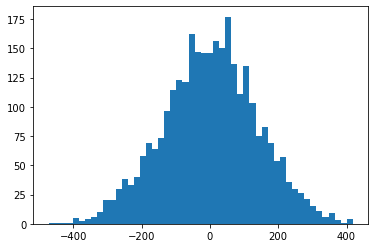

In [9]:
plt.hist(y_test - y_pred, bins=50);

Widać, że `RandomForest` radzi sobie lepiej niż pojedyncze drzewo decyzyjne.

## XGBRegressor
Stwórzmy domyślny model, żeby zobaczyć, jakie posiada on parametry i jakie są wartości domyślne.

In [10]:
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=0)
model

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=0, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

CPU times: user 19.7 s, sys: 25.1 ms, total: 19.7 s
Wall time: 3.95 s
CPU times: user 46.2 ms, sys: 50 µs, total: 46.2 ms
Wall time: 9.49 ms


0.9115357729928115

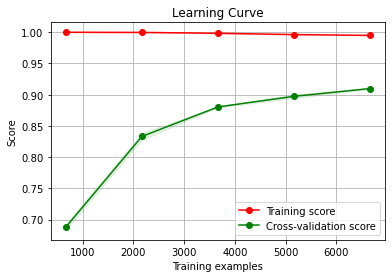

In [11]:
%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=2019, shuffle=True)

r2_score(y_test, y_pred)

### Rozkład błędów

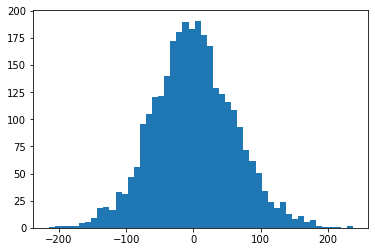

In [12]:
plt.hist(y_test - y_pred, bins=50);

Widzimy, że XGBoost radzi sobie nawet jeszcze lepiej niż `RandomForest`. Większość błędów jest w przedziale od -100 do 100.

## LGBMRegressor

In [13]:
model = lgb.LGBMRegressor(n_estimators=100, random_state=0, max_depth=3)
model

LGBMRegressor(max_depth=3, random_state=0)

CPU times: user 2.03 s, sys: 18.8 ms, total: 2.05 s
Wall time: 404 ms
CPU times: user 58.7 ms, sys: 21 µs, total: 58.7 ms
Wall time: 7.78 ms


0.9183419448346071

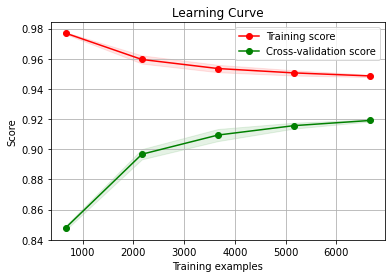

In [14]:
%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True)

r2_score(y_test, y_pred)

### Rozkład błędów

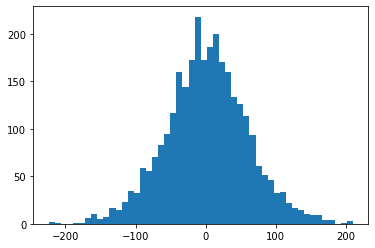

In [15]:
plt.hist(y_test - y_pred, bins=50);

Rozkład błędów wygląda podobnie jak przy `XGBoost`, ale zwróć uwagę na szybkość trenowania (i prognozowania) :).

## [CatBoostRegressor](https://bit.ly/2PRoKOQ)
W tym przypadku `CatBoost` nie zdążył rozpędzić się. Dzieje się tak między innymi dlatego, że nie ma zmiennych kategorialnych.

*Swoją drogą*, wynik i tak jest lepszy niż dla lasów losowych.

In [16]:
model = ctb.CatBoostRegressor(n_estimators=100, depth=5, random_state=0, verbose=False)

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

r2_score(y_test, y_pred)

CPU times: user 3.92 s, sys: 295 ms, total: 4.22 s
Wall time: 1.06 s
CPU times: user 96.7 ms, sys: 1.97 ms, total: 98.6 ms
Wall time: 91.2 ms


0.9831958708912603

<AxesSubplot:title={'center':'Learning Curve'}, xlabel='Training examples', ylabel='Score'>

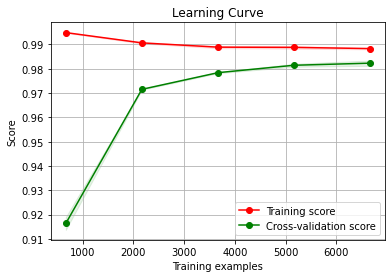

In [17]:
plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True)

## Zobaczmy rozkład błędów

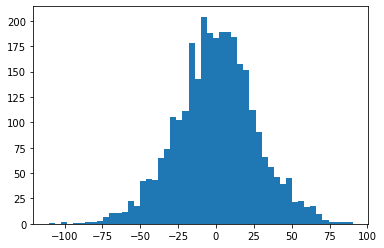

In [18]:
plt.hist(y_test - y_pred, bins=50);

W poprzednich edycjach tu było napisane: `Wynik jest lepszy niż lasy losowe, ale gorszy niż xgboost albo lightgbm`.


Jak widać obecna wersja `catboost` radzi sobie świetnie! Też liczy się znaczniej szybciej niż wcześniej (ciągle optymalizują). Dlatego warto mieć na uwagdzę ten model ;).

# [Klasyfikacja](https://bit.ly/3mCIEZT) (ang. `classification`)

Teraz używając funkcji `make_classification` wygenerujemy dane dla klasyfikacji, np. 10000 wierszy i 100 kolumn (cech).

In [19]:
X, y = make_classification(n_samples=10000, n_features=100, hypercube=False, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## DecisionTreeClassifier i RandomForestClassifier
Sprawdźmy również DT i RF.

CPU times: user 469 ms, sys: 59 µs, total: 469 ms
Wall time: 468 ms
CPU times: user 2.04 ms, sys: 274 µs, total: 2.32 ms
Wall time: 1.7 ms


0.8398216939078752

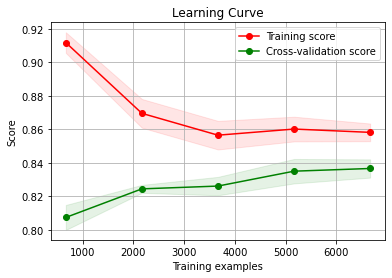

In [20]:
model = DecisionTreeClassifier(random_state=0, max_depth=5)

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True, scoring='f1')

f1_score(y_test, y_pred)

CPU times: user 3.07 s, sys: 6.05 ms, total: 3.07 s
Wall time: 3.08 s
CPU times: user 33.7 ms, sys: 9 µs, total: 33.7 ms
Wall time: 33.3 ms


0.8245355352403421

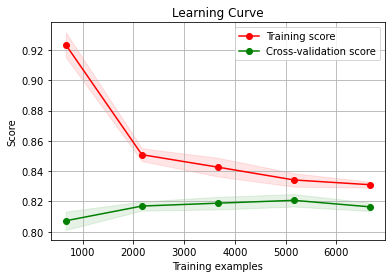

In [21]:
model = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=5)

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True, scoring='f1')

f1_score(y_test, y_pred)

Ciekawa sprawa, pojedyncze drzewo poradziło sobie lepiej! To dlatego trzeba sprawdzać poszczególne modele.

## XGBClassifier

In [22]:
model = xgb.XGBClassifier(random_state=0, n_estimators=100)
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=0, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

CPU times: user 20.5 s, sys: 20.9 ms, total: 20.5 s
Wall time: 4.09 s
CPU times: user 54.7 ms, sys: 17 µs, total: 54.7 ms
Wall time: 10.2 ms


0.8507232994767621

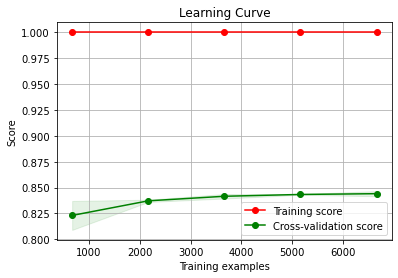

In [23]:
%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True, scoring='f1')

f1_score(y_test, y_pred)

### XGB + Learning Curve
Uwaga! Teraz pokażę Ci inny rodzaj krzywej uczenia się, w której na osi x będzie ilość iteracji (gdzie każda iteracja oznacza dodawanie kolejnego modelu, domyślnie drzewa).

[0]	validation_0-error:0.15120	validation_1-error:0.18720
[1]	validation_0-error:0.12900	validation_1-error:0.17680
[2]	validation_0-error:0.12500	validation_1-error:0.17440


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[3]	validation_0-error:0.12560	validation_1-error:0.17300
[4]	validation_0-error:0.12200	validation_1-error:0.17100
[5]	validation_0-error:0.12080	validation_1-error:0.17140
[6]	validation_0-error:0.11720	validation_1-error:0.17240
[7]	validation_0-error:0.11480	validation_1-error:0.17100
[8]	validation_0-error:0.11240	validation_1-error:0.17220
[9]	validation_0-error:0.10420	validation_1-error:0.16760
[10]	validation_0-error:0.10100	validation_1-error:0.16920
[11]	validation_0-error:0.09640	validation_1-error:0.16860
[12]	validation_0-error:0.09320	validation_1-error:0.16740
[13]	validation_0-error:0.08900	validation_1-error:0.16760
[14]	validation_0-error:0.08480	validation_1-error:0.16760
{'validation_0': {'error': [0.1512, 0.129, 0.125, 0.1256, 0.122, 0.1208, 0.1172, 0.1148, 0.1124, 0.1042, 0.101, 0.0964, 0.0932, 0.089, 0.0848]}, 'validation_1': {'error': [0.1872, 0.1768, 0.1744, 0.173, 0.171, 0.1714, 0.1724, 0.171, 0.1722, 0.1676, 0.1692, 0.1686, 0.1674, 0.1676, 0.1676]}}



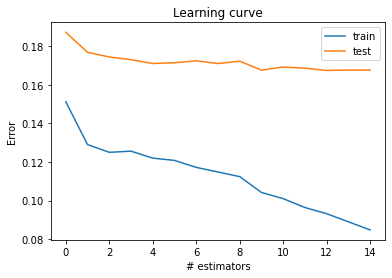

[0]	validation_0-error:0.14660	validation_1-error:0.17780
[1]	validation_0-error:0.14540	validation_1-error:0.17940
[2]	validation_0-error:0.14200	validation_1-error:0.17900
[3]	validation_0-error:0.13580	validation_1-error:0.17460
[4]	validation_0-error:0.13400	validation_1-error:0.17440
[5]	validation_0-error:0.12700	validation_1-error:0.16960
[6]	validation_0-error:0.12460	validation_1-error:0.16840
[7]	validation_0-error:0.12300	validation_1-error:0.16640
[8]	validation_0-error:0.11660	validation_1-error:0.16140
[9]	validation_0-error:0.11700	validation_1-error:0.16340
[10]	validation_0-error:0.11340	validation_1-error:0.16420
[11]	validation_0-error:0.11000	validation_1-error:0.16160
[12]	validation_0-error:0.10500	validation_1-error:0.16040
[13]	validation_0-error:0.09880	validation_1-error:0.16260
[14]	validation_0-error:0.09520	validation_1-error:0.16620
{'validation_0': {'error': [0.1466, 0.1454, 0.142, 0.1358, 0.134, 0.127, 0.1246, 0.123, 0.1166, 0.117, 0.1134, 0.11, 0.105, 0

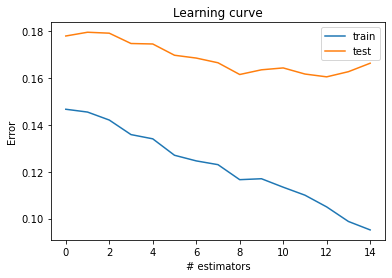

In [24]:
cv = StratifiedKFold(n_splits=2, random_state=0)

for train_idx, test_idx in cv.split(X, y):
    model = xgb.XGBClassifier(n_estimators=15)
    
    ###### prepare eval_set
    eval_set = [
        (X[train_idx], y[train_idx]), 
        (X[test_idx],  y[test_idx]) 
    ]
    
    model.fit(X[train_idx], y[train_idx], eval_metric="error", eval_set=eval_set, verbose=True)
    
    ###### get evals result
    evals_result = model.evals_result()
    print(evals_result)
    print("")
    
    ###### plot
    plt.title("Learning curve")
    plt.xlabel("# estimators")
    plt.ylabel("Error")
    plt.plot( model.evals_result_['validation_0']['error'], label='train' )
    plt.plot( model.evals_result_['validation_1']['error'], label='test' )
    plt.legend(loc='best')
    plt.show()

## LGBMClassifier

In [25]:
model = lgb.LGBMClassifier(n_estimators=100, random_state=0)
model

LGBMClassifier(random_state=0)

In [26]:
%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)
f1_score(y_test, y_pred)

CPU times: user 6.54 s, sys: 21.6 ms, total: 6.56 s
Wall time: 1.31 s
CPU times: user 40.3 ms, sys: 2 µs, total: 40.3 ms
Wall time: 5.41 ms


0.8538083538083537

## LightGBM + Learning Curve

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[1]	valid_0's binary_error: 0.137	valid_0's binary_logloss: 0.636892	valid_1's binary_error: 0.1778	valid_1's binary_logloss: 0.641752
[2]	valid_0's binary_error: 0.1338	valid_0's binary_logloss: 0.590666	valid_1's binary_error: 0.1682	valid_1's binary_logloss: 0.599537
[3]	valid_0's binary_error: 0.1256	valid_0's binary_logloss: 0.551902	valid_1's binary_error: 0.1704	valid_1's binary_logloss: 0.565048
[4]	valid_0's binary_error: 0.1236	valid_0's binary_logloss: 0.51967	valid_1's binary_error: 0.1712	valid_1's binary_logloss: 0.536496
[5]	valid_0's binary_error: 0.1188	valid_0's binary_logloss: 0.491387	valid_1's binary_error: 0.171	valid_1's binary_logloss: 0.512159
[6]	valid_0's binary_error: 0.1192	valid_0's binary_logloss: 0.466345	valid_1's binary_error: 0.1672	valid_1's binary_logloss: 0.48969
[7]	valid_0's binary_error: 0.1162	valid_0's binary_logloss: 0.445038	valid_1's binary_error: 0.1658	valid_1's binary_logloss: 0.471373
[8]	valid_0's binary_error: 0.1138	valid_0's binary_

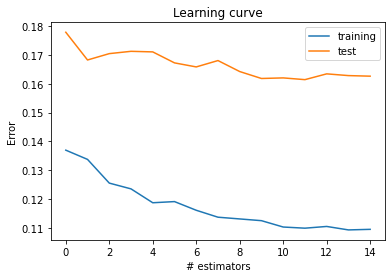

[1]	valid_0's binary_error: 0.1466	valid_0's binary_logloss: 0.640533	valid_1's binary_error: 0.1636	valid_1's binary_logloss: 0.642977
[2]	valid_0's binary_error: 0.141	valid_0's binary_logloss: 0.59537	valid_1's binary_error: 0.1628	valid_1's binary_logloss: 0.601057
[3]	valid_0's binary_error: 0.1384	valid_0's binary_logloss: 0.558208	valid_1's binary_error: 0.16	valid_1's binary_logloss: 0.566469
[4]	valid_0's binary_error: 0.1376	valid_0's binary_logloss: 0.527591	valid_1's binary_error: 0.1596	valid_1's binary_logloss: 0.539499
[5]	valid_0's binary_error: 0.1282	valid_0's binary_logloss: 0.498873	valid_1's binary_error: 0.158	valid_1's binary_logloss: 0.51329
[6]	valid_0's binary_error: 0.1262	valid_0's binary_logloss: 0.474414	valid_1's binary_error: 0.154	valid_1's binary_logloss: 0.491317
[7]	valid_0's binary_error: 0.1236	valid_0's binary_logloss: 0.45354	valid_1's binary_error: 0.154	valid_1's binary_logloss: 0.474606
[8]	valid_0's binary_error: 0.126	valid_0's binary_loglos

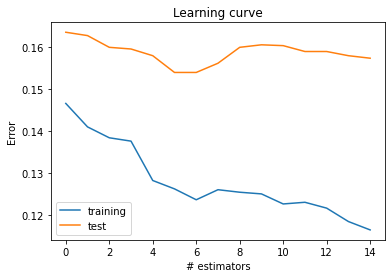

In [27]:
cv = StratifiedKFold(n_splits=2, random_state=0)

for train_idx, test_idx in cv.split(X, y):
    model = lgb.LGBMClassifier(n_estimators=15)
    
    ###### prepare eval_set
    eval_set = [
        (X[train_idx], y[train_idx]), 
        (X[test_idx],  y[test_idx]) 
    ]
    
    model.fit(X[train_idx], y[train_idx], eval_metric="error", eval_set=eval_set, verbose=True)
    
    ###### get evals result
    evals_result = model.evals_result_
    print(evals_result)
    print("")
    
    ###### plot
    plt.title("Learning curve")
    plt.xlabel("# estimators")
    plt.ylabel("Error")
    plt.plot( model.evals_result_['valid_0']['binary_error'], label='training' )
    plt.plot( model.evals_result_['valid_1']['binary_error'], label='test' )
    plt.legend(loc='best')
    plt.show()

## CatBoostClassifier

In [28]:
model = ctb.CatBoostClassifier(n_estimators=10, depth=10, verbose=False, random_state=0)

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

f1_score(y_test, y_pred)

CPU times: user 6.03 s, sys: 139 ms, total: 6.17 s
Wall time: 1.42 s
CPU times: user 96.9 ms, sys: 1.05 ms, total: 97.9 ms
Wall time: 94.5 ms


0.8406153846153845

## Podsumowanie

### Najważniejsze parametry

**Uwaga!** W tym przypadku to są parametry XGBoost. Dla LightGBM i CatBoost pomysły są podobne, tylko parametry mogą mieć trochę inną nazwę. Na przykład `max_depth` w CatBoost ma nazwę `depth`.

1. `n_estimators` - oznacza ilość drzew (możesz próbować np. od 10 do 100).
2. `max_depth` - maksymalna głębokość każdego drzewa (możesz próbować od 3 do 7).
3. `learning_rate` - krok uczenia się (możesz próbować od 0.1 do 0.7).
4. `subsample` - podzbiór, na którym model uczy się (wtedy jak jest `overfitting`, zmniejsz z 1.0 do 0.8 czy nawet do 0.6).
5. `colsample_bytree` - podobnie jak sample, tylko na kolumnach (cechach). Zmniejszaj wtedy, gdy pojawia się `overfitting`.

## Zadanie 3.2.1

Spróbuj zastosować jeden lub wszystkie trzy algorytmy do poprzedniego zadania (adult dataset). Weź najlepszą wersję swojego kodu i tylko zmień algorytm.

*Swoją drogą*, skorzystaj z trochę bardziej zmodyfikowanej wersji `learning curves` dla `xgboost` - tej w której na osi X zamiast zmiany rozmiaru `train size` będzie ilość iteracji (drzew).

In [29]:
train = pd.read_hdf('../input/train.adult.h5')

In [48]:
feats = train.select_dtypes(include=[np.object]).columns

for feat in feats:
    train['{0}_cat'.format(feat)] = pd.factorize(train[feat]) [0]
    
feats = train.select_dtypes(include = [np.int]).columns.values
feats = feats[:-1]

X = train[feats].values
y = train['Target_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

[1 1 0 ... 1 0 0]


CPU times: user 7.16 s, sys: 11.7 ms, total: 7.17 s
Wall time: 1.4 s
CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 55 ms


0.6113313126602938

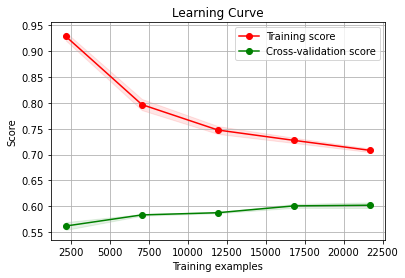

In [45]:
model = xgb.XGBClassifier(random_state=0, n_estimators=100)
model

%time model.fit(X_train, y_train)
%time y_pred = model.predict(X_test)

plot_learning_curve(model, X, y, cv=3, random_state=0, shuffle=True, scoring='f1')

f1_score(y_test, y_pred)

[0]	validation_0-error:0.17150	validation_1-error:0.17996
[1]	validation_0-error:0.16990	validation_1-error:0.17831
[2]	validation_0-error:0.16953	validation_1-error:0.17843
[3]	validation_0-error:0.16947	validation_1-error:0.17806
[4]	validation_0-error:0.16708	validation_1-error:0.17640
[5]	validation_0-error:0.16671	validation_1-error:0.17677
[6]	validation_0-error:0.16591	validation_1-error:0.17702
[7]	validation_0-error:0.16284	validation_1-error:0.17444
[8]	validation_0-error:0.16130	validation_1-error:0.17511
[9]	validation_0-error:0.16112	validation_1-error:0.17487


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[10]	validation_0-error:0.15909	validation_1-error:0.17333
[11]	validation_0-error:0.15860	validation_1-error:0.17266
[12]	validation_0-error:0.15682	validation_1-error:0.17204
[13]	validation_0-error:0.15657	validation_1-error:0.17216
[14]	validation_0-error:0.15516	validation_1-error:0.17118
{'validation_0': {'error': [0.171499, 0.169902, 0.169533, 0.169472, 0.167076, 0.166708, 0.165909, 0.162838, 0.161302, 0.161118, 0.159091, 0.1586, 0.156818, 0.156572, 0.15516]}, 'validation_1': {'error': [0.179964, 0.178306, 0.178429, 0.17806, 0.176402, 0.17677, 0.177016, 0.174436, 0.175112, 0.174866, 0.173331, 0.172655, 0.172041, 0.172164, 0.171181]}}



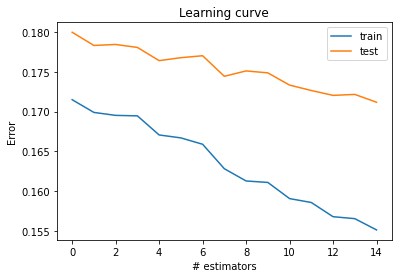

[0]	validation_0-error:0.17413	validation_1-error:0.18059
[1]	validation_0-error:0.17266	validation_1-error:0.17832
[2]	validation_0-error:0.16965	validation_1-error:0.17242
[3]	validation_0-error:0.16965	validation_1-error:0.17469
[4]	validation_0-error:0.16793	validation_1-error:0.17359
[5]	validation_0-error:0.16756	validation_1-error:0.17199
[6]	validation_0-error:0.16700	validation_1-error:0.17187
[7]	validation_0-error:0.16676	validation_1-error:0.17144
[8]	validation_0-error:0.16547	validation_1-error:0.17285
[9]	validation_0-error:0.16473	validation_1-error:0.17310
[10]	validation_0-error:0.16375	validation_1-error:0.17322
[11]	validation_0-error:0.16277	validation_1-error:0.17322
[12]	validation_0-error:0.16184	validation_1-error:0.17236
[13]	validation_0-error:0.16111	validation_1-error:0.17230
[14]	validation_0-error:0.16043	validation_1-error:0.17224
{'validation_0': {'error': [0.174129, 0.172655, 0.169646, 0.169646, 0.167926, 0.167557, 0.167004, 0.166759, 0.165469, 0.16473

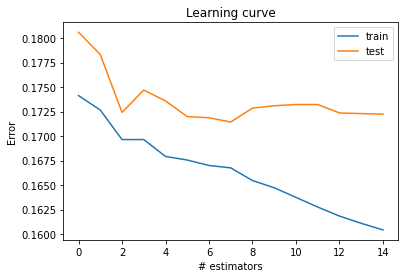

In [46]:
cv = StratifiedKFold(n_splits=2, random_state=0)

for train_idx, test_idx in cv.split(X, y):
    model = xgb.XGBClassifier(n_estimators=15)
    
    ###### prepare eval_set
    eval_set = [
        (X[train_idx], y[train_idx]), 
        (X[test_idx],  y[test_idx]) 
    ]
    
    model.fit(X[train_idx], y[train_idx], eval_metric="error", eval_set=eval_set, verbose=True)
    
    ###### get evals result
    evals_result = model.evals_result()
    print(evals_result)
    print("")
    
    ###### plot
    plt.title("Learning curve")
    plt.xlabel("# estimators")
    plt.ylabel("Error")
    plt.plot( model.evals_result_['validation_0']['error'], label='train' )
    plt.plot( model.evals_result_['validation_1']['error'], label='test' )
    plt.legend(loc='best')
    plt.show()

## Przydatne linki:
1. [Gradient Boosting from scratch](https://bit.ly/3dZdYym)
2. [Boosting algorithm: XGBoost](https://bit.ly/3uE4TBy)
3. [Complete Guide to Parameter Tuning in XGBoost (with codes in Python)](https://bit.ly/3mGIv7N)
4. [Benchmarking LightGBM: how fast is LightGBM vs xgboost?](https://bit.ly/3d94mlf)
5. [CatBoost: A machine learning library to handle categorical (CAT) data automatically](https://bit.ly/3s91TeL)  
6. [CatBoost benchmark](https://bit.ly/3dQttZf)
7. [Tree Boosting With XGBoost Why Does XGBoost Win "Every" Machine Learning Competition?](https://bit.ly/3241ShB)
8. [XGBoost: Scalable GPU Accelerated Learning](https://bit.ly/3mDymZE)
9. [How to explain gradient boosting](https://bit.ly/3taFvDh)